<a href="https://colab.research.google.com/github/kelseyneis/horoscope-mining/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 5523 Final project
Mohammed Guiga, Kelsey Neis, Sai Sharan Sundar, Josh Spitzer-Resnick

## imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for reading csv in Colab
# from google.colab import files
# uploaded = files.upload() # if first time uncomment this and manually load in data # use chrome not firefox, not incognito
# import io

# exploratory analysis
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

# Download stopwords
nltk.download('stopwords')
nltk.download('wordnet') # get_lemmas
nltk.download('punkt') # nltk.word_tokenize in get_lemmas

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# If wordcloud has errors, run these lines and restart the kernel
# !pip install --upgrade pip
# !pip install --upgrade wordcloud

In [4]:
# df = pd.read_csv( io.BytesIO(uploaded['horoscope_saved.csv']) ) # nrows = 100. Use with Google Colab
df = pd.read_csv("../horoscope_saved.csv")
# horoscopes = np.genfromtxt(io.BytesIO(uploaded['horoscope_saved.csv']), delimiter = ',', max_rows = 100)

## exploratory data analysis

### word count visualizations

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [77]:
def in_pos(pos, pos_tags):
    result = False
    for i in pos_tags:
        if pos == i:
            result = True
    return result

In [104]:
def get_filtered_pos(pos_tags, pos, feature_names, tfidf_list):
    tfidf_filtered = []
    pos_tags = [t[0] for t in pos_tags if in_pos(t[1], pos)]
    words_in_pos = np.zeros(len(feature_names), dtype=bool)
    for i in range(len(feature_names)):
        for x in pos_tags:
            if x == feature_names[i]:
                words_in_pos[i] = True

    for i in range(len(tfidf_list)):
        tfidf_filtered.append([tfidf_list[i][x] for x in range(len(tfidf_list[i])) if words_in_pos[x] == True])

    pos_words = []

    for j in range(len(feature_names)):
        if words_in_pos[j] == True:
            pos_words.append(feature_names[j])
    
    return (tfidf_filtered, pos_words)

In [105]:
from nltk.tokenize import RegexpTokenizer
def adj_cloud(sign, category, tfidf_threshold, pos=None):
    pos_tags = []
    horoscopes = df[(df['category'] == category) & (df['sign'] == sign)]['horoscope']

    tokenizer = RegexpTokenizer(r'\w+')

    for horoscope in horoscopes:
        tokens = tokenizer.tokenize(horoscope)
        for token in tokens:
            pos_tags.append(token)
    
    stop_words = text.ENGLISH_STOP_WORDS.union(['don', 'aren', 'make', 'isn', 'new', 'good', 'll', 've', 'like', 'say', 'let', 'subject', 'doesn'])
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    vecs = vectorizer.fit_transform(horoscopes)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_list = vecs.todense().tolist()

    pos_tags = nltk.pos_tag(pos_tags)
    if pos != None:
        (tfidf_filtered, pos_words) = get_filtered_pos(pos_tags, pos, feature_names, tfidf_list)
        cloud_df = pd.DataFrame(tfidf_filtered, columns=pos_words)
        drop_cols = [x for x in pos_words if max(cloud_df[x]) < tfidf_threshold]
    else:
        cloud_df = pd.DataFrame(tfidf_list, columns = feature_names)
        drop_cols = [x for x in feature_names if max(cloud_df[x]) < tfidf_threshold]

    cloud_df = cloud_df.drop(columns=drop_cols)

    return WordCloud(background_color="black", max_words=50, width = 200,  height = 200) \
        .generate_from_frequencies(cloud_df.T.sum(axis=1))
    
    

In [18]:
def show_wordcloud(self, wordcloud, sign):
    self.imshow(wordcloud)
    self.set_axis_off()
    self.set_title(sign)

In [106]:
wordclouds_general = []
signs = ['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra',
       'scorpio', 'sagittarius', 'capricorn', 'aquarius', 'pisces']
for sign in signs:
    wordclouds_general.append(adj_cloud(sign=sign, category='general', tfidf_threshold=.35, pos=["JJ"]))

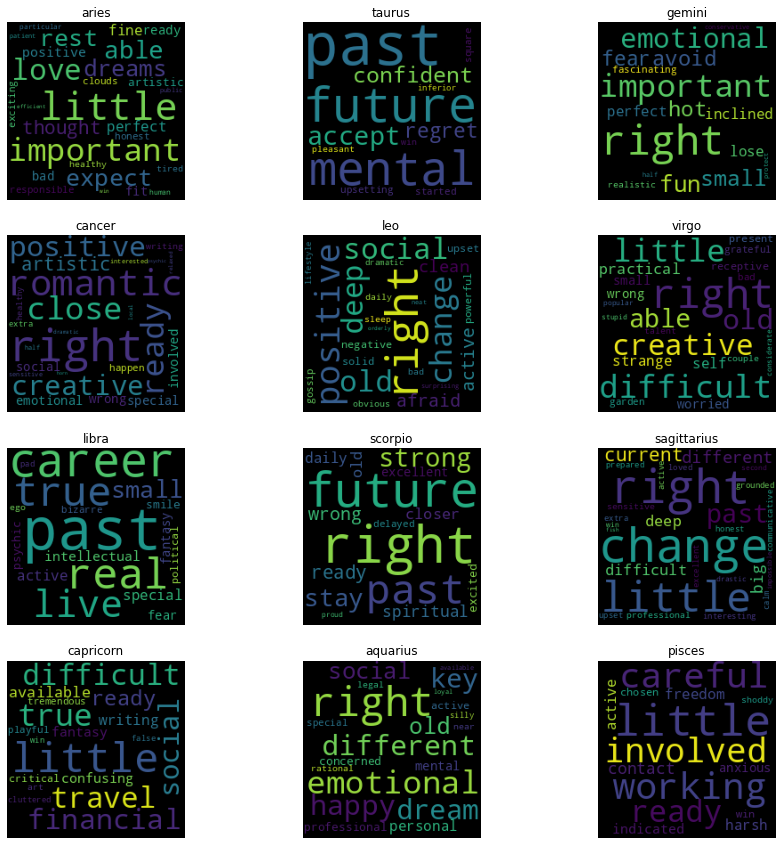

In [107]:
fig, ((aries, taurus, gemini), (cancer, leo, virgo), (libra,
       scorpio, sagittarius), (capricorn, aquarius, pisces)) = plt.subplots(4,3, figsize=[15, 15])

sign_plots = [aries, taurus, gemini, cancer, leo, virgo, libra,
       scorpio, sagittarius, capricorn, aquarius, pisces]

for i in range(len(sign_plots)):
    show_wordcloud(sign_plots[i], wordclouds_general[i], signs[i])

plt.show()